In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import imutils
from skimage.draw import line
import pandas as pd
from scipy.fft import irfft2, fftshift, irfft
from scipy.optimize import curve_fit

In [2]:
omega = pd.read_csv("firstdata.csv", usecols = [0], names = ['omega'], skiprows = [0]) * 2 * np.pi
separations = pd.read_csv("firstdata.csv", usecols = [1], names = ['seps'], skiprows = [0]) / 100

In [3]:
length = 2.583
deltaL = 0.001
deltaD = 2/15725
hVal = 0.15
deltaH = 0.005099
laserLambda = 0.000000633
kval = (np.pi * hVal * separations)/(laserLambda * (hVal**2 + length**2))

deltaKfromL = (separations * hVal * 2 * length) * (1/((hVal**2 + length**2)**2)) * deltaL #DeltaK from length
deltaKfromD = hVal * (1/(hVal**2 + length**2)) * deltaD #DeltaK from separations
deltaKfromH = (separations) * (length**2 - hVal**2) *(1/((hVal**2 + length**2)**2)) * deltaH #DeltaK from height calc

deltaK = (np.pi/laserLambda) * (deltaKfromL + deltaKfromD + deltaKfromH) #Uncertainty in k
deltaKCube = 3*(kval ** 2) * deltaK #Uncertainty in k cube
omegasq = omega ** 2
kcube = kval ** 3

print(kcube)
print(omegasq)

           seps
0  2.022449e+10
1  1.673258e+10
2  1.464359e+10
3  1.184789e+10
4  1.019725e+10
5  9.432791e+09
6  8.707523e+09
7  6.756569e+09
8  5.632995e+09
9  3.773667e+09
          omega
0  4.563705e+06
1  4.042590e+06
2  3.553058e+06
3  3.095108e+06
4  2.668741e+06
5  2.273957e+06
6  1.910755e+06
7  1.579137e+06
8  1.279101e+06
9  1.010647e+06


0.00023110219067698254


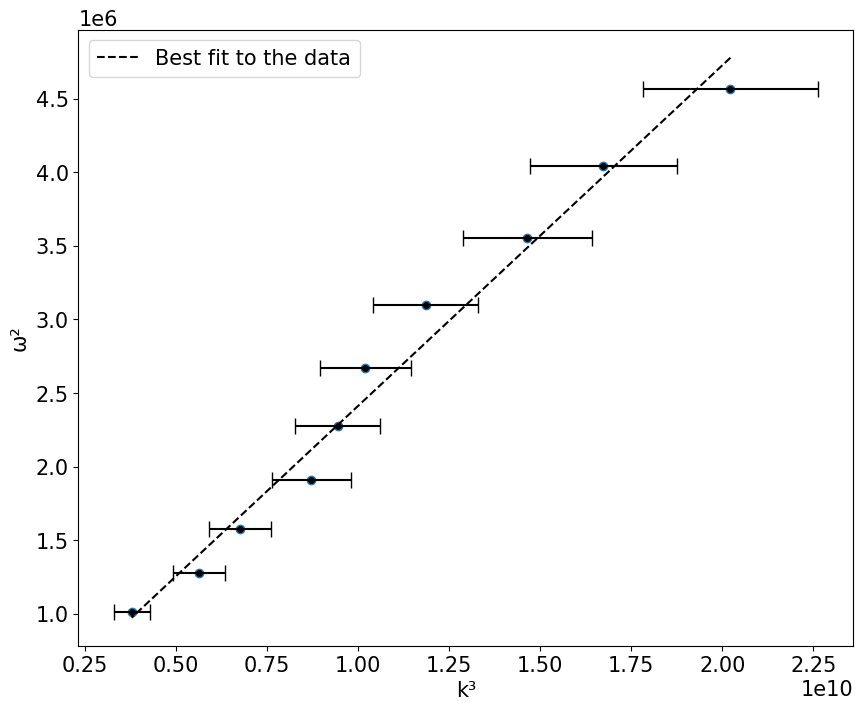

In [10]:
plt.rcParams['font.size'] = 15
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('k³')
ax.set_ylabel('ω²')

ax.scatter(kcube, omegasq)
ax.errorbar(kcube.seps,           
             omegasq,              
             xerr=deltaKCube.seps,     
             marker='o',             
             markersize = 4,
             markerfacecolor = 'black',
             color='black',          
             linestyle='none',       
             capsize=6,              
             )
ax.plot(kcube.seps, kcube.seps*slope+intercept, 
         linestyle='--',
         color='black',
         label='Best fit to the data')

ax.legend(loc="upper left")


In [11]:
def line(x, slope, intercept):          # Set up the linear fitting - don't ammend
    return slope*x + intercept          # More set up, leave alone.

# Next few line, fits a line to the (x data, and y data) no need to change things.
popt, pcov = curve_fit(line,kcube.seps,omegasq.omega)
slope = popt[0]
intercept = popt[1]
err_slope = np.sqrt(float(pcov[0][0]))
err_intercept = np.sqrt(float(pcov[1][1]))

print(slope)

0.00023110219067698254
